# Goal: Identify asteroids containing rare earth elements that have orbits intersecting near earth.

Goal 1: Aquire data from Asterank vis csv
Goal 2: Clean data
Goal 3: Identify asteroids that have an orbit approaching earth (0.8 AU to 1.2 AU: Au = astronimal units. Earth is 1 AU)
Goal 4: Determin quantity of rare earth metals on asteroids in terms of dollars. 



# General Information from Asterang wepsite
Keys identifed so far on api: Name of asteroid: key:"full_name" (example: "full_name": "138911 (2001 AE2)")

class SMASSII (Bus Class): key = "spec" (example:"spec": "T") ? SMASSII has 13 main catogories wich can have more subcatogories for more info: https://en.wikipedia.org/wiki/Asteroid_spectral_types

location data: key= "a" (example: "a": 1.349610289614184) a is astronimical unit

Compistion data ???????????

Value estimates: key = value:"price" (example: "price": 132253.45366384918) Value estimates are based on the mass of a given asteroid and its spectral type. Asteroid spectra is used to infer composition, which, in conjunction with current market prices, determine potential value.

Profit estimats: key = "profit" (example: "profit": 28914.585070637186) Profit and ROI calculations are a combination of accessibility and value. The formula strikes a balance between high value and high distance and energy expenditure. Mining costs are factored in as a flat percentage of potential value

Class type: key= "class" (exampaple: "class": "AMO")

Class types:
AMO: Amor asteroids -- whose orbits approach but do not cross Earth orbit, and whose orbits are further from the Sun than Earth's orbit. Many have orbits which reside entirely between Earth and Mars. Some of these are economically attractive in the near term.

APO: Apollo asteroids -- whose orbits cross Earth's orbit. Apollo asteroids spend most of their time outside Earth orbit. Many of these are economically attractive in the near term. Technically, they have wider orbits than Earth.

APO: (PHAAten asteroids -- whose orbits also cross Earth's orbit, but unlike Apollos, Atens spend most of their time inside Earth orbit. A large percentage of known Atens are economically attractive in the near term.

In [1]:
 # Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
import os
import json
import scipy.stats as st

In [2]:
asteroid_value_df = pd.read_csv("asteroidraw.csv")

In [4]:
asteroid_value_df

,Name,Type,AU,e,Value,($),label,value_dollar,Est. Profit ($),Δv (km/s),MOID (AU),Group
0,Ryugu,Cg,1.190,0.190,82.76,billion,billion,82760000000,30.08 billion,4.663,0.000638,APO (PHA)
1,1989 ML,X,1.272,0.137,13.94,billion,billion,13940000000,4.38 billion,4.889,0.082029,AMO
2,Nereus,Xe,1.489,0.360,4.71,billion,billion,4710000000,1.39 billion,4.987,0.003153,APO (PHA)
3,Bennu,B,1.126,0.204,669.96,million,million,669960000,185.00 million,5.096,0.003223,APO (PHA)
4,Didymos,Xk,1.644,0.384,62.25,billion,billion,62250000000,16.41 billion,5.162,0.039777,APO (PHA)
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2018 ML2,?,1.910,0.081,0,NaN,Not available,NaN,0,10.007,0.841297,IMB
3996,2018 MK2,?,3.049,0.072,0,NaN,Not available,NaN,0,11.054,1.840580,MBA
3997,2018 MH2,?,2.954,0.066,0,NaN,Not available,NaN,0,10.904,1.755310,MBA
3998,2018 MG2,?,3.148,0.170,0,NaN,Not available,NaN,0,13.103,1.765750,MBA


In [ ]:
asteroid_value_critical_df = asteroid_value_df.drop(["Type", "Est. Profit ($)","Δv (km/s)"], axis = 1)
asteroid_value_critical_df

In [5]:
asteroid_value_df["bin_group"] = ""
asteroid_value_df

,Name,Type,AU,e,Value,($),label,value_dollar,Est. Profit ($),Δv (km/s),MOID (AU),Group,bin_group
0,Ryugu,Cg,1.190,0.190,82.76,billion,billion,82760000000,30.08 billion,4.663,0.000638,APO (PHA),
1,1989 ML,X,1.272,0.137,13.94,billion,billion,13940000000,4.38 billion,4.889,0.082029,AMO,
2,Nereus,Xe,1.489,0.360,4.71,billion,billion,4710000000,1.39 billion,4.987,0.003153,APO (PHA),
3,Bennu,B,1.126,0.204,669.96,million,million,669960000,185.00 million,5.096,0.003223,APO (PHA),
4,Didymos,Xk,1.644,0.384,62.25,billion,billion,62250000000,16.41 billion,5.162,0.039777,APO (PHA),
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2018 ML2,?,1.910,0.081,0,NaN,Not available,NaN,0,10.007,0.841297,IMB,
3996,2018 MK2,?,3.049,0.072,0,NaN,Not available,NaN,0,11.054,1.840580,MBA,
3997,2018 MH2,?,2.954,0.066,0,NaN,Not available,NaN,0,10.904,1.755310,MBA,
3998,2018 MG2,?,3.148,0.170,0,NaN,Not available,NaN,0,13.103,1.765750,MBA,


In [6]:
# Replace NaN in ($) with zero for futrue grouping
asteroid_value_df["($)"].fillna("zero", inplace=True)
asteroid_value_df["value_dollar"].fillna(0, inplace=True)

# Create final column Too Much for value greater than 100 trillion
asteroid_value_df.loc[asteroid_value_df["Value"] == ">100", ["($)"]] = "Too Much" 

asteroid_value_df

,Name,Type,AU,e,Value,($),label,value_dollar,Est. Profit ($),Δv (km/s),MOID (AU),Group,bin_group
0,Ryugu,Cg,1.190,0.190,82.76,billion,billion,82760000000,30.08 billion,4.663,0.000638,APO (PHA),
1,1989 ML,X,1.272,0.137,13.94,billion,billion,13940000000,4.38 billion,4.889,0.082029,AMO,
2,Nereus,Xe,1.489,0.360,4.71,billion,billion,4710000000,1.39 billion,4.987,0.003153,APO (PHA),
3,Bennu,B,1.126,0.204,669.96,million,million,669960000,185.00 million,5.096,0.003223,APO (PHA),
4,Didymos,Xk,1.644,0.384,62.25,billion,billion,62250000000,16.41 billion,5.162,0.039777,APO (PHA),
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2018 ML2,?,1.910,0.081,0,zero,Not available,0,0,10.007,0.841297,IMB,
3996,2018 MK2,?,3.049,0.072,0,zero,Not available,0,0,11.054,1.840580,MBA,
3997,2018 MH2,?,2.954,0.066,0,zero,Not available,0,0,10.904,1.755310,MBA,
3998,2018 MG2,?,3.148,0.170,0,zero,Not available,0,0,13.103,1.765750,MBA,


# Cleaned Data Frame for all Data

In [8]:
# Replace NaN in ($) with zero for futrue grouping
asteroid_value_df["($)"].fillna("zero", inplace=True)
asteroid_value_df["value_dollar"].fillna(0, inplace=True)

# Create final column Too Much for value greater than 100 trillion
asteroid_value_df.loc[asteroid_value_df["Value"] == ">100", ["($)"]] = "Too Much" 

asteroid_value_df

,Name,Type,AU,e,Value,($),label,value_dollar,Est. Profit ($),Δv (km/s),MOID (AU),Group,bin_group
0,Ryugu,Cg,1.190,0.190,82.76,billion,billion,82760000000,30.08 billion,4.663,0.000638,APO (PHA),
1,1989 ML,X,1.272,0.137,13.94,billion,billion,13940000000,4.38 billion,4.889,0.082029,AMO,
2,Nereus,Xe,1.489,0.360,4.71,billion,billion,4710000000,1.39 billion,4.987,0.003153,APO (PHA),
3,Bennu,B,1.126,0.204,669.96,million,million,669960000,185.00 million,5.096,0.003223,APO (PHA),
4,Didymos,Xk,1.644,0.384,62.25,billion,billion,62250000000,16.41 billion,5.162,0.039777,APO (PHA),
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2018 ML2,?,1.910,0.081,0,zero,Not available,0,0,10.007,0.841297,IMB,
3996,2018 MK2,?,3.049,0.072,0,zero,Not available,0,0,11.054,1.840580,MBA,
3997,2018 MH2,?,2.954,0.066,0,zero,Not available,0,0,10.904,1.755310,MBA,
3998,2018 MG2,?,3.148,0.170,0,zero,Not available,0,0,13.103,1.765750,MBA,


In [9]:
# Have four classes need
total_asteroids_group = asteroid_value_df["($)"].value_counts()
total_asteroids_df = pd.DataFrame(total_asteroids_group)
total_asteroids_df.reset_index()

,index,($)
0,zero,3011
1,Too Much,700
2,billion,196
3,trillion,67
4,million,26


In [10]:
Close_df= asteroid_value_df.loc[(asteroid_value_df["AU"] < 1.20) & (asteroid_value_df["AU"]> 0.8)].copy()
Close_df

,Name,Type,AU,e,Value,($),label,value_dollar,Est. Profit ($),Δv (km/s),MOID (AU),Group,bin_group
0,Ryugu,Cg,1.190,0.190,82.76,billion,billion,82760000000,30.08 billion,4.663,0.000638,APO (PHA),
3,Bennu,B,1.126,0.204,669.96,million,million,669960000,185.00 million,5.096,0.003223,APO (PHA),
7,2001 CC21,L,1.032,0.219,147.04,billion,billion,1.47E+11,29.77 billion,5.636,0.083067,APO,
11,2000 CE59,L,1.137,0.167,10.65,billion,billion,10650000000,1.80 billion,6.015,0.008298,APO (PHA),
18,1989 UQ,B,0.915,0.265,600.73,billion,billion,6.01E+11,87.58 billion,6.402,0.013980,ATE (PHA),
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,2018 MG7,?,0.912,0.327,0,zero,Not available,0,0,11.363,0.022256,ATE (PHA),
3928,2018 MD7,?,0.947,0.110,0,zero,Not available,0,0,5.906,0.002274,ATE,
3933,2018 MY6,?,0.905,0.154,0,zero,Not available,0,0,21.595,0.026055,ATE (PHA),
3957,2018 MQ5,?,1.077,0.023,0,zero,Not available,0,0,5.256,0.050464,AMO,


In [11]:
close_orbit = Close_df["($)"].value_counts()
close_orbit_Plot_df = pd.DataFrame(close_orbit )
close_orbit_Plot_df.reset_index()

,index,($)
0,zero,134
1,billion,18
2,million,6
3,trillion,5


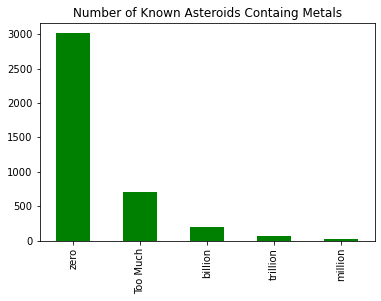

In [12]:
#####################################################
##    Bar chart depicting Total number of asteroids based on quantity of rare eear tvalue
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_asteroids_df.plot(kind = "bar", y="($)", title = "Number of Known Asteroids Containg Metals", legend = False, facecolor = "green",)



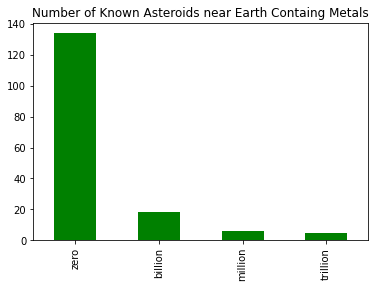

In [13]:
#####################################################
##    Bar chart depicting Total number of asteroids based on quantity of rare eear tvalue
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
close_orbit_Plot_df.plot(kind = "bar", y="($)", title = "Number of Known Asteroids near Earth Containg Metals", legend = False, facecolor = "green",)



KeyError: 'Column not found: index'

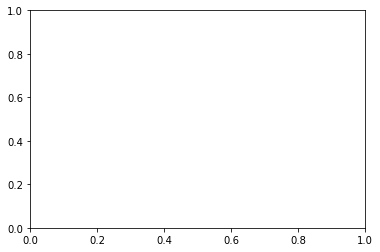

In [18]:
#############    Goal
# Generate a box plot of the quantity of asteroidsin dollars in four regimens of interest

#Tumor volume at last observation.

Close_df.boxplot(by="value_dollar", column= ["index"], labels=None, sym="r" ) 

plt.ylabel("quantiy of metals in $")
plt.title("")
plt.tight_layout()
plt.show()

In [15]:
#################################################################
#################### Goal
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#    y values: Value of Rare earth elements
scater_plot_y= rare_earth_df["AU"]



#    x values: Mouse weight
scater_plot_x = rare_earth_df["value_dollar"]


# Setting up the scatter plot
plt.scatter(scater_plot_x, scater_plot_y, label="Proximity of high value asteroids")

# Plot formating
plt.xlabel("Value of Rare Earth Elements")
plt.ylabel("Orbial distance from sun ")
#plt.title("Mouse Weights against Average Tumor Volumes")
plt.legend()
plt.show()
plt.tight_layout()

NameError: name 'rare_earth_df' is not defined

In [ ]:
######################################
######      Goal
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# set x and y
# Taken from scater plot above for x and y
x_values = scater_plot_x
y_values = scater_plot_y

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, label="asteroid")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Value")
plt.ylabel("Orbit (AU)")
plt.annotate(line_eq,(20,15),fontsize=20,color="red")
#plt.legend()



# Print r value
print(f"The r-value is: {rvalue**2}")

# can not get this to work
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Show plot
plt.show()